# Assignment 1 Part B
# Title Page

https://www.kaggle.com/datasets/zalando-research/fashionmnist

***1.*** Introduce the problem you wish to solve. Explain what questions would you want to ask from the dataset?
- Part B1. Introduce the problem you wish to solve (use the MNIST case as a guide). Explain what questions would you want to ask from the selected dataset?
- 10 pts

- Referring to *LogisticRegression_PRML_MNIST.pdf* from Week 3:
  - "human benchmark for classifying MNIST is about 97.5% accuracy"
- I would like to see if I can score this
- Noting this is a different dataset

***2.*** Describe the dataset. What do the rows and columns mean and are there any special characteristics in the data to use in modelling the learning?
- B2. Describe the dataset, how would you visualise data to extract patterns to use?
- 5 pts


- The Fashion-MNIST dataset contains pictures clothing. 
- The clothing is from a brand called Zalando. From a brief search online it appears Zalando is a clothing retailer and tech company.
- Each picture is 28x28 pixels = 748 pixels
- Each row represents an individual piece of clothing 
- Column 1 is the class label 
- Columns 2 to 748 are pixel integers, range from 1 to 255. 

***3.*** Explain why Logistic Regression would suit as the learning model to answer the questions.
- B3. Explain why Logistic Regression suits the dataset and problems investigate.
- 5 pts


- I guess it's categorical data, so we'll use a classification algorithm 

# Python constructs – explain each step below

***4.*** Retrieving data in the program
- B4. Retrieving data in the program - explain how this is done?
- 5 pts

- Download zip folder from https://www.kaggle.com/datasets/zalando-research/fashionmnist
- Extract the zip file to directory .\Fashion-MNIST
- Run below statements to import

In [63]:
import pandas as pd
train = pd.read_csv('.\\Fashion-MNIST\\fashion-mnist_train.csv')
test = pd.read_csv('.\\Fashion-MNIST\\fashion-mnist_test.csv')

***5.*** Exploring data – explain any special adaptation and characteristics  
- i. Show image & data
- ii. Show corresponding matrix
- iii. Describe & understand the data
- B5. Explore data for patterns and relationships as used in the design - use visualisation and other relevant statistics measures (as for MNIST).
- 5 pts

In [20]:
label_mapping = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
train['label'] = train['label'].map(label_mapping)

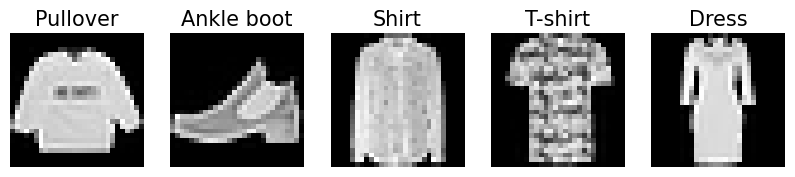

In [31]:
import numpy as np
import matplotlib.pyplot as plt

labels = train['label'].values
images = train.drop('label', axis=1).values

plt.figure(figsize=(10,2))
for idx in range(5):
    image = images[idx]
    label = labels[idx]
    plt.subplot(1, 5, idx + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f'{label}', fontsize=15)
    plt.axis('off')

plt.show()

In [33]:
# Corresponding Matrix
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,Trouser,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,Bag,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
print(np.array(train.iloc[1, 1:]).reshape(28, 28))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 81 21 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 14 200 49 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 1 1 0 1 0 0 0 162 184 165 20 0 1 1 3 4 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 0 120 183 154 206 32 0 5 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 76 227 151 139 158 0 0 0 0 0 66 23 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 55 224 162 143 121 204 236 144 21 74 90 190
  8 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 42 228 160 148 125 165 223 208 221 246 211
  174 151 0 0]
 [0 0 0 1 3 0 1 0 3 0 9 0 23 230 168 147 119 163 227 206 200 190 206 186
  139 171 41 0]
 [0 0 0 0 0 0 0 0 3 4 0 16 209 185 139 118 181 227 209 204 210 199 225
  157 127 190 111 0]
 [1 3 2 1 3 2 3 0 0 0 67 214 

In [62]:
# Describe and understand the data
# TODO

***6.*** Build a Logistic Regression model
   - i. Load packages
   - ii. Select target variable
   - iii. Prepare data
   - iv. Split data into training and validation set
   - v. Select a linear regression classifier
   - vi. Fit the data
   - vii. Prediction of unseen data
- B6. Building a LogRegression model. Explain logistic regression and how it suits the chosen dataset and the problem?
- 6 pts

In [55]:
# i. Load packages
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\1.PatternReg.ML\\introduction_to_ml_with_python')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [59]:
# ii. Select Target Variable
y = train['label']

In [60]:
# iii. Prepare data

In [69]:
# iv. Split data into training and validation set
print(len(train))
print(len(test))

60000
10000


***7.*** Analysis of results – classification report
   - i. Create confusion matrix
   - ii. Visualise correct prediction
   - iii. Visualise misclassified images
   - iv. Visualise corrected images
- B7. Analysis of results - explain the classification report and accuracy evaluation, how might cross-validation be used when training a logistic regression model - use the example to illustrate?
- 10 pts 

***8.*** Explain the concept of regularization in logistic regression and how does it prevent overfitting?
   - Explain how can it be used in Fashion-MNIST modelling?
- B8. Explain the concept of regularization in logistic regression and how does it prevent overfitting? How can it be used in this problem?
- 5 pts

***9.*** Save trained model and explain how you would use it for new unseen data.
- B9. Saved model, how to access and use it for prediction on new inputs
- 4 pts

# Rubric
https://uclearn.canberra.edu.au/courses/16042/assignments/129302